<a href="https://colab.research.google.com/github/yokesh412/house-price-predictions/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
import numpy as np


In [45]:
train = pd.read_csv('/content/drive/MyDrive/house price/train.csv')

In [46]:
test = pd.read_csv('/content/drive/MyDrive/house price/test.csv')

In [47]:
df = pd.concat([test.assign(ind="test"), train.assign(ind="train")])

In [48]:
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

In [49]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,test,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,test,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,test,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,test,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,test,NaN


In [50]:
print(df.shape)

(2919, 82)


In [51]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,train,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,train,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,train,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,train,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,train,250000.0


In [52]:
print(train.shape)

(1460, 82)


In [53]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,test,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,test,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,test,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,test,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,test,NaN


In [54]:
print(test.shape)

(1459, 82)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [56]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [57]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
YrSold              0
SaleType            1
SaleCondition       0
ind                 0
SalePrice        1459
Length: 82, dtype: int64

In [58]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

MSZoning 0.0014  % missing values
LotFrontage 0.1665  % missing values
Alley 0.9322  % missing values
Utilities 0.0007  % missing values
MasVnrType 0.0082  % missing values
MasVnrArea 0.0079  % missing values
BsmtQual 0.0277  % missing values
BsmtCond 0.0281  % missing values
BsmtExposure 0.0281  % missing values
BsmtFinType1 0.0271  % missing values
BsmtFinType2 0.0274  % missing values
BsmtFullBath 0.0007  % missing values
BsmtHalfBath 0.0007  % missing values
Functional 0.0007  % missing values
FireplaceQu 0.4865  % missing values
GarageType 0.0538  % missing values
GarageYrBlt 0.0545  % missing values
GarageFinish 0.0545  % missing values
GarageQual 0.0545  % missing values
GarageCond 0.0545  % missing values
PoolQC 0.9966  % missing values
Fence 0.8044  % missing values
MiscFeature 0.964  % missing values
SalePrice 0.4998  % missing values


observation

Features like Fence,PoolQC,miscfeatures,Alley contains large number of nullvalues.so i removes those features from dataset

In [59]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,NaN
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,NaN
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,NaN
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,NaN
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,NaN


In [60]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [61]:
import matplotlib.pyplot as plt
import seaborn as sn

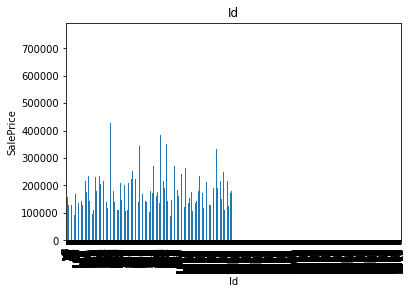

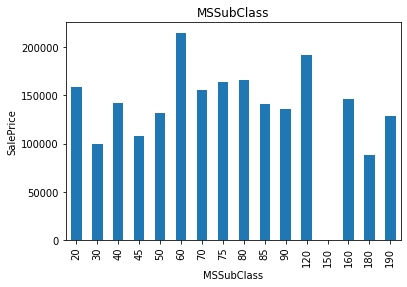

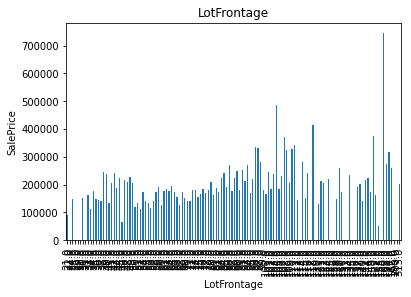

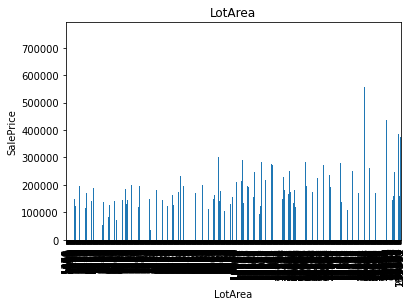

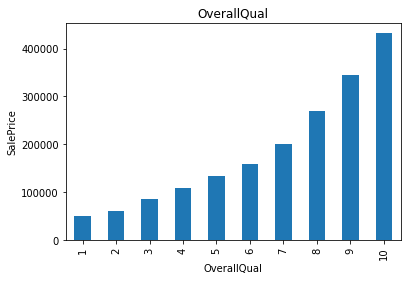

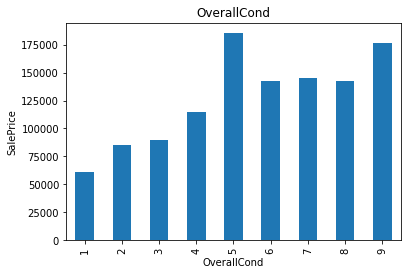

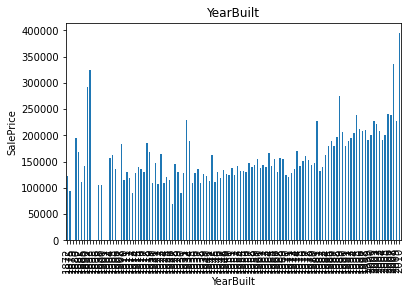

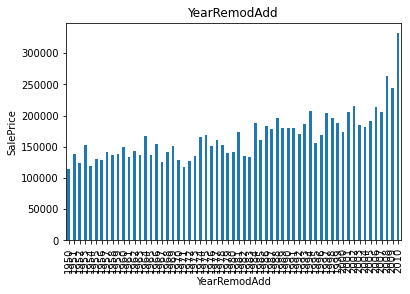

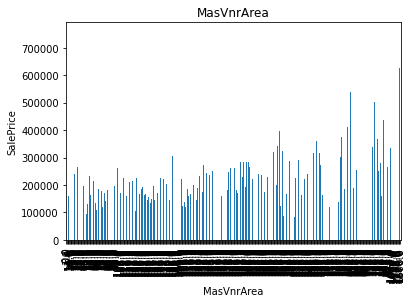

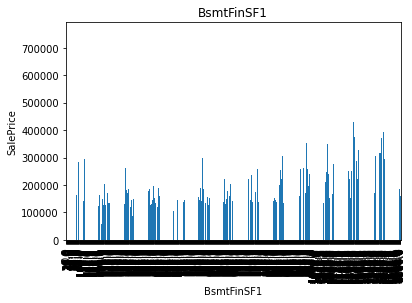

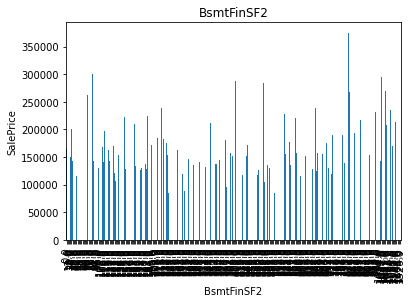

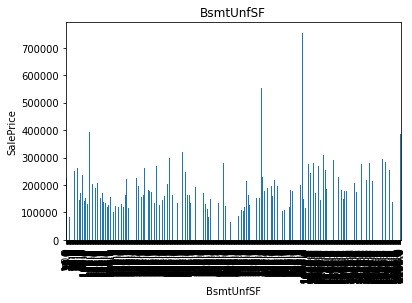

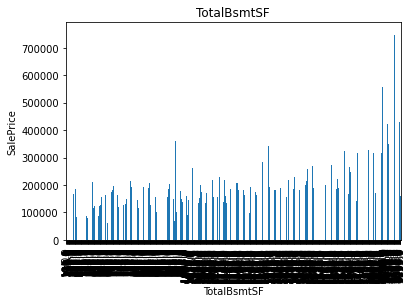

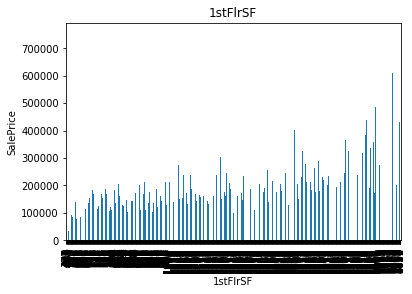

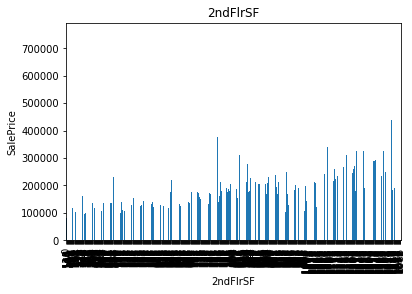

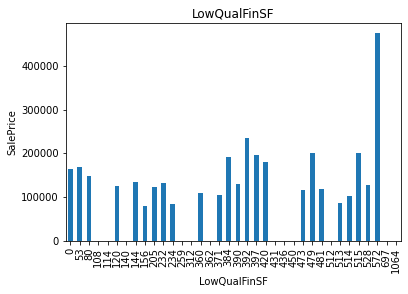

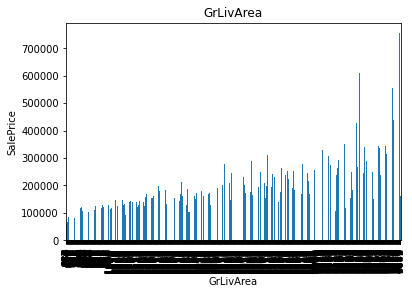

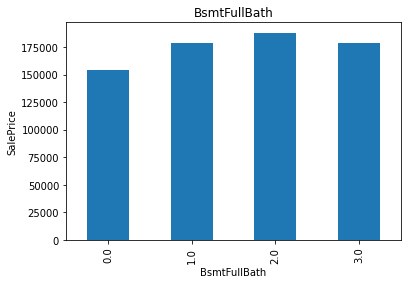

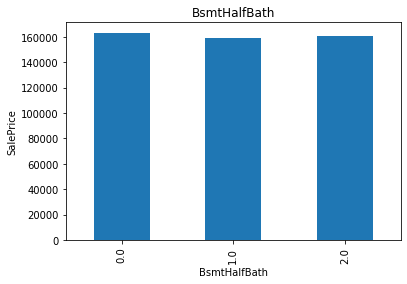

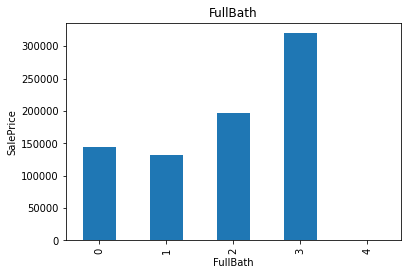

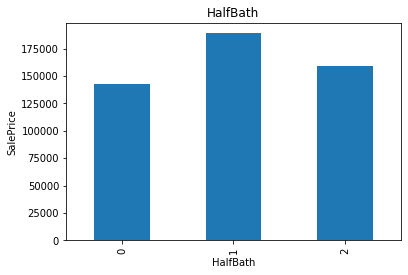

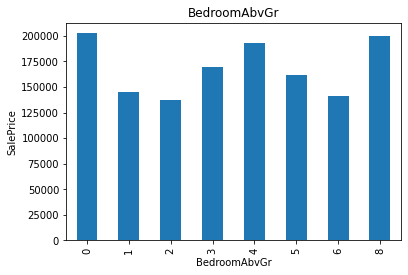

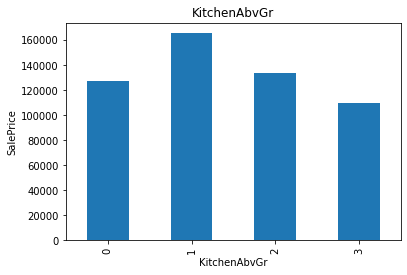

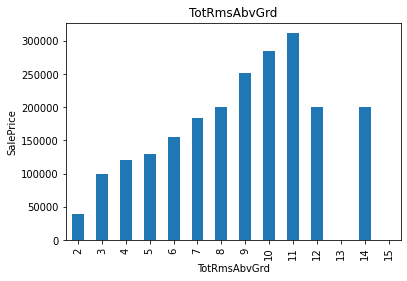

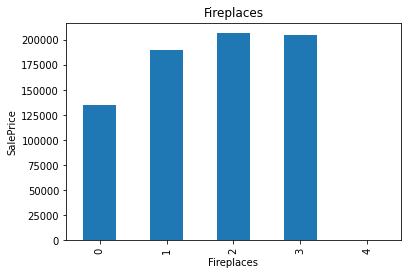

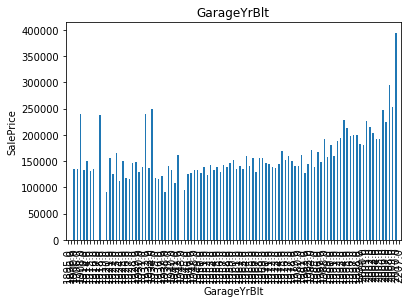

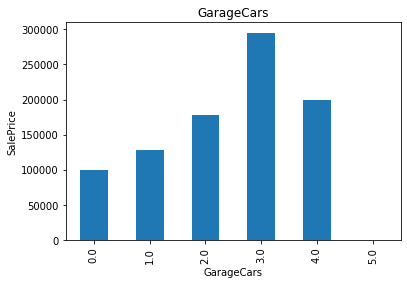

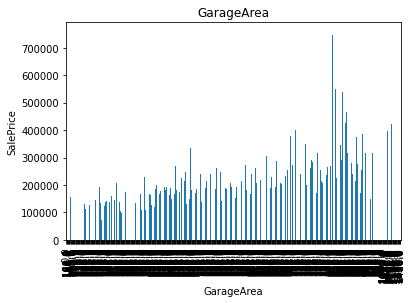

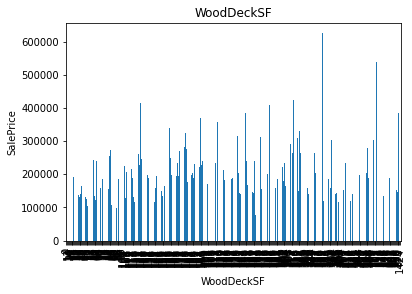

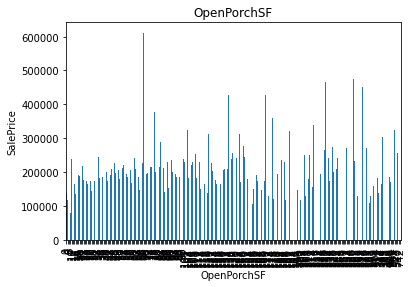

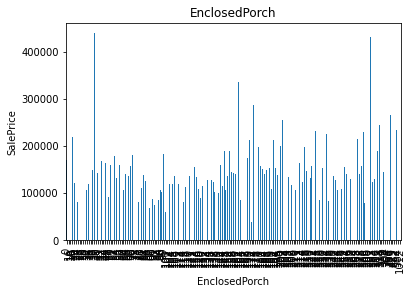

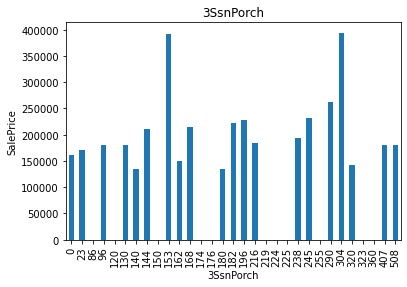

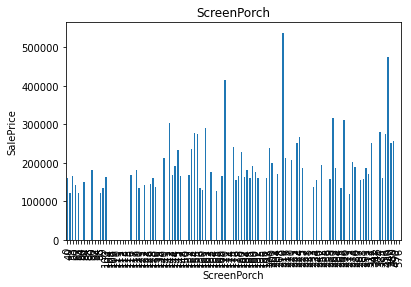

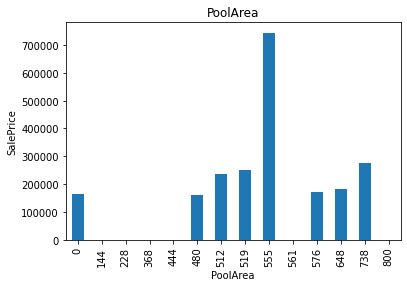

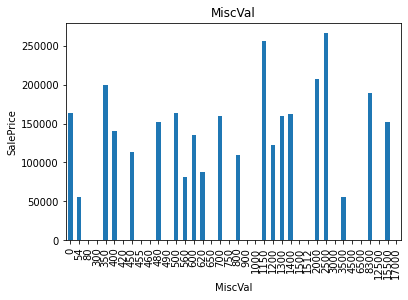

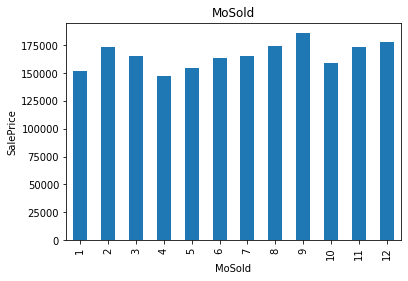

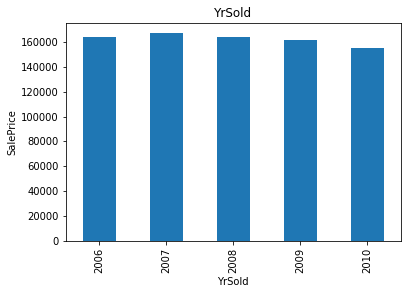

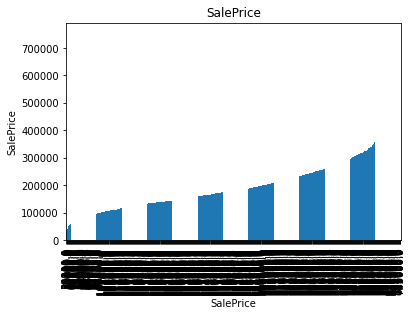

In [62]:
## Lets Find the realtionship between them and Sale PRice

for feature in numerical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

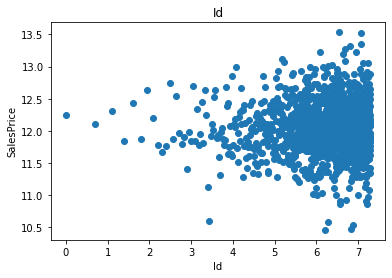

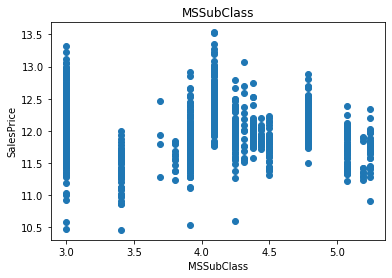

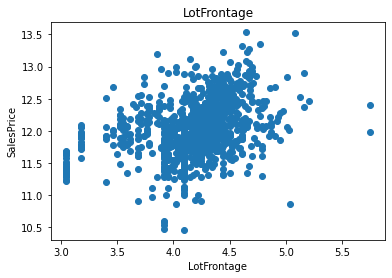

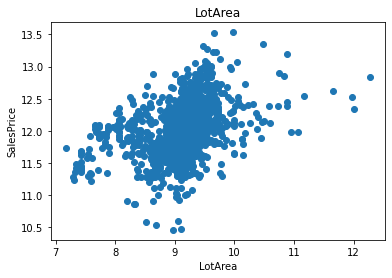

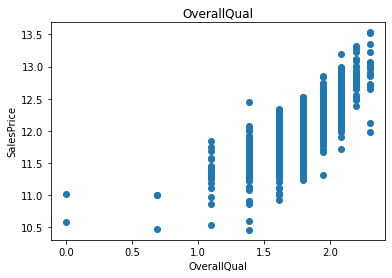

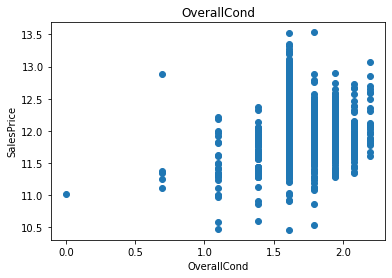

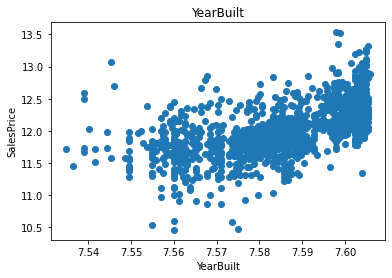

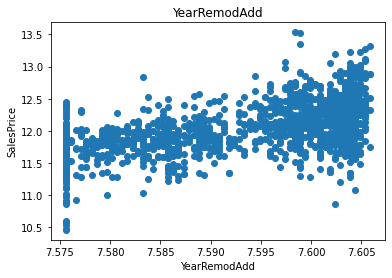

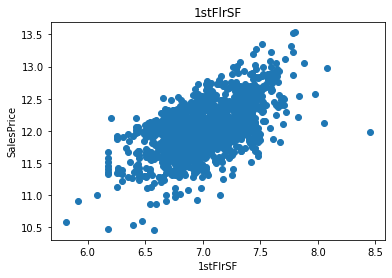

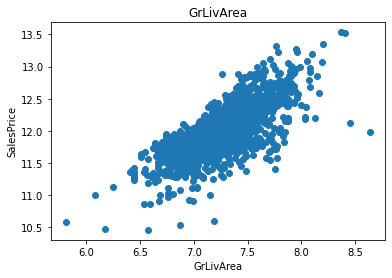

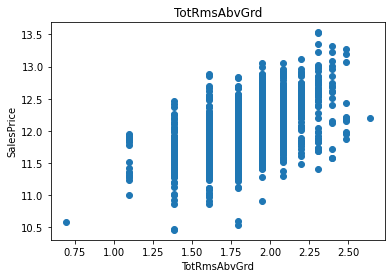

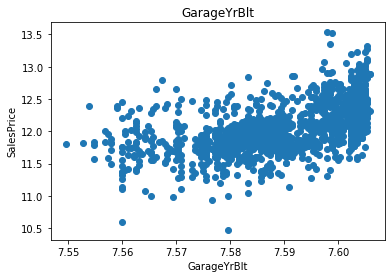

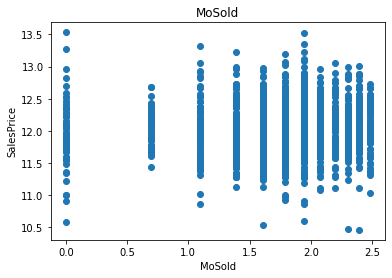

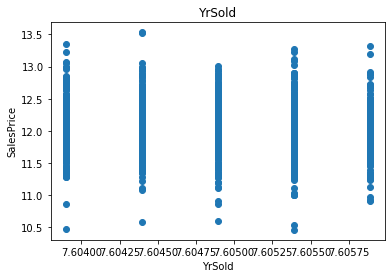

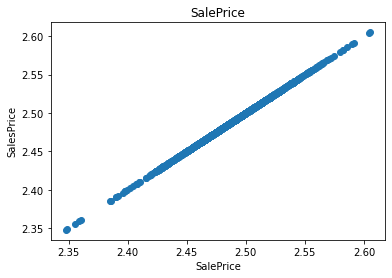

In [63]:

for feature in numerical_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

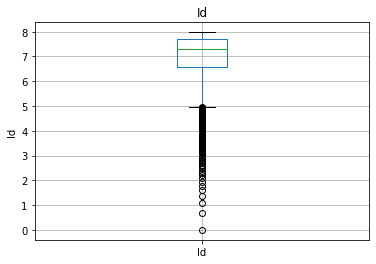

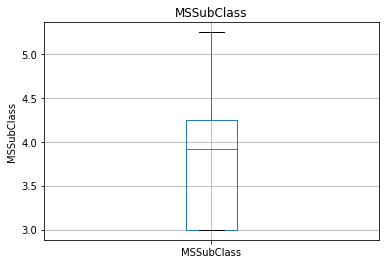

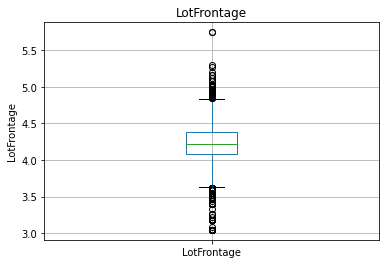

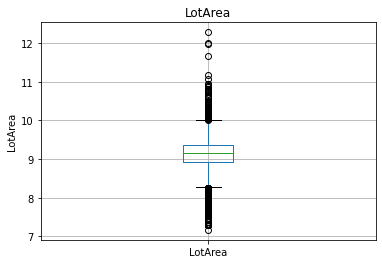

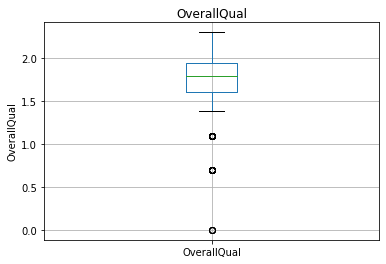

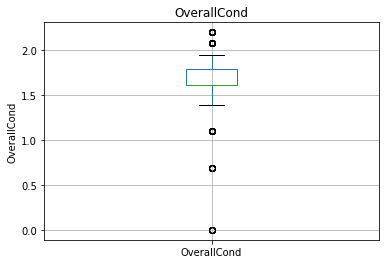

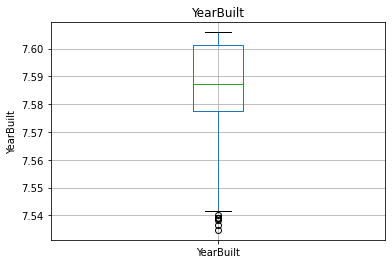

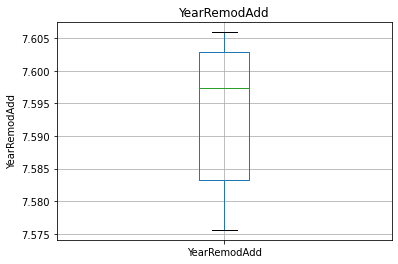

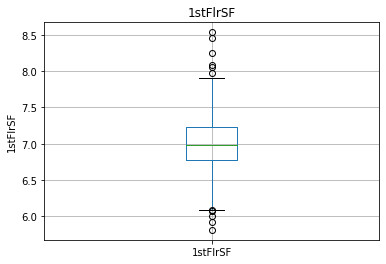

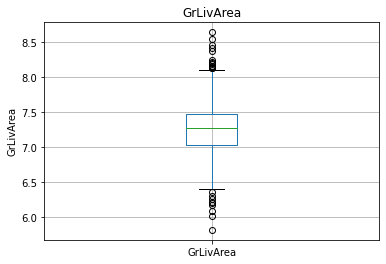

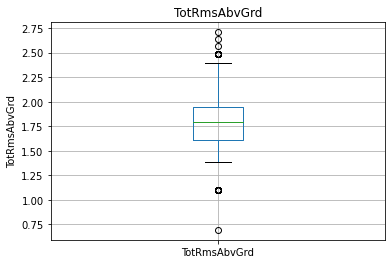

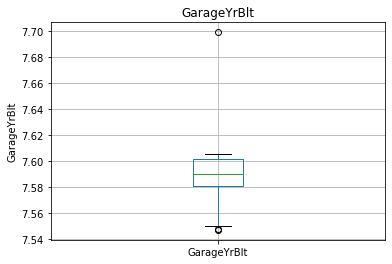

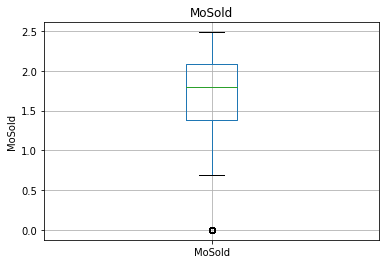

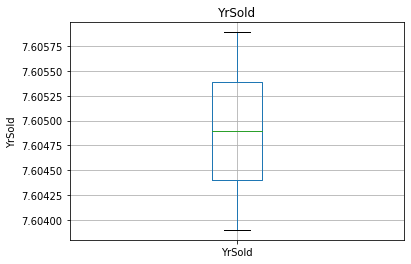

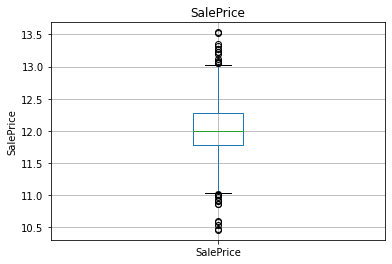

In [64]:
#checking outliers
for feature in numerical_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Categorical variable

In [65]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'ind']

In [66]:

df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,ind
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,test
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,test
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,test
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal,test
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,test


In [67]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and number of categories are 6
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 3
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 16
The feature is Exterior2nd and number of categories are 17
The feature is MasVnrType and number of cate

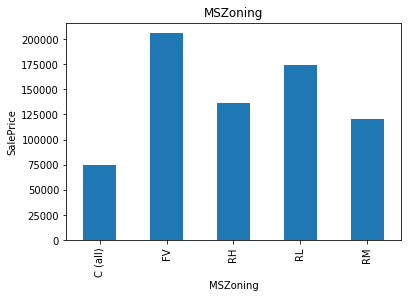

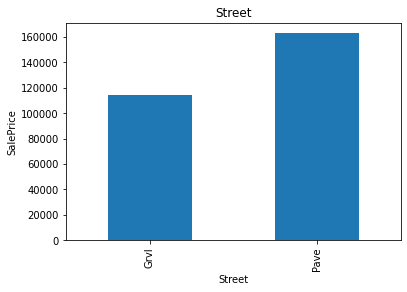

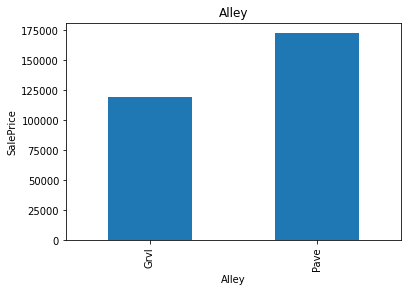

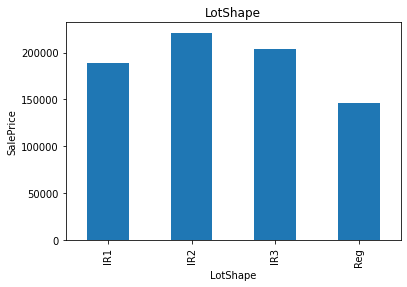

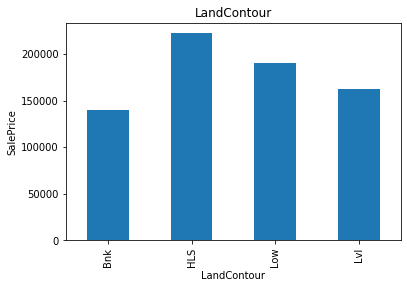

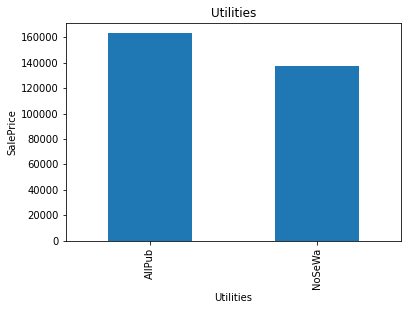

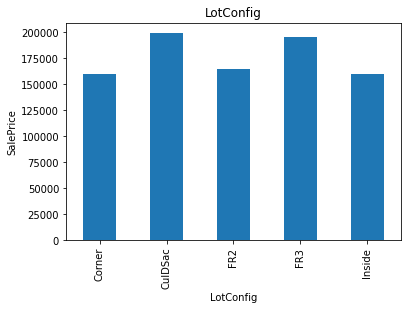

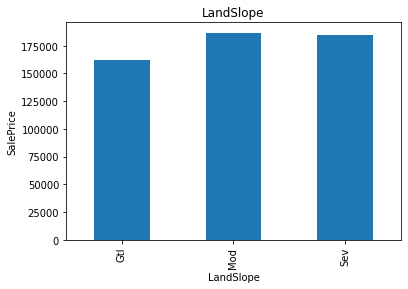

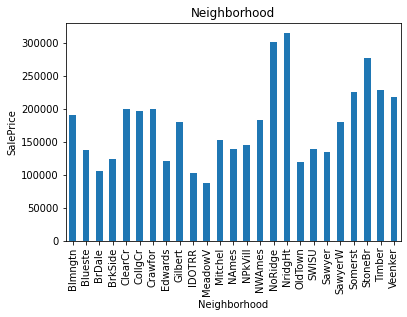

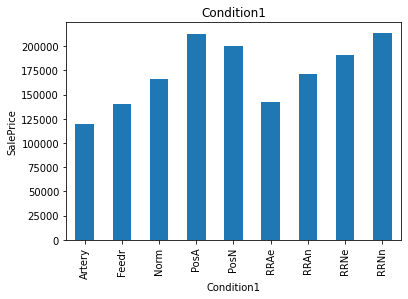

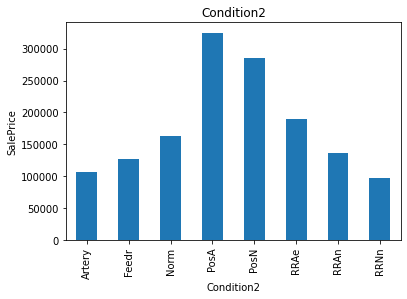

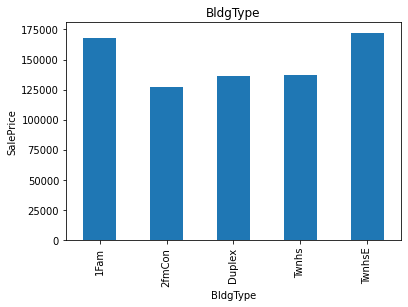

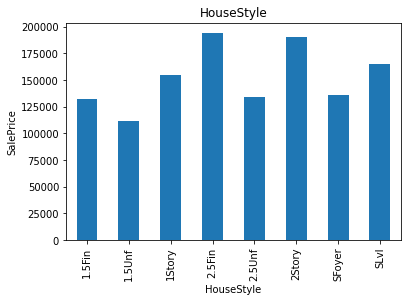

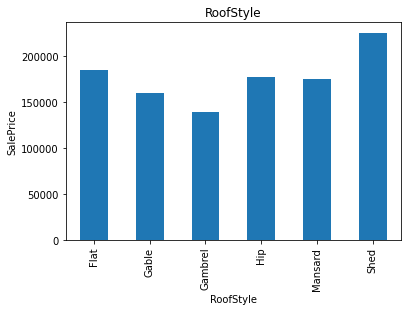

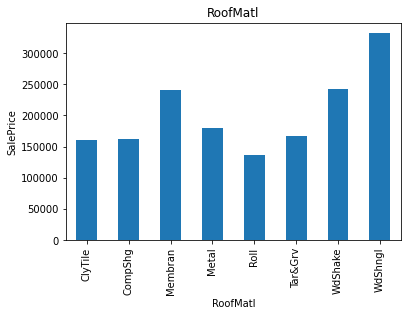

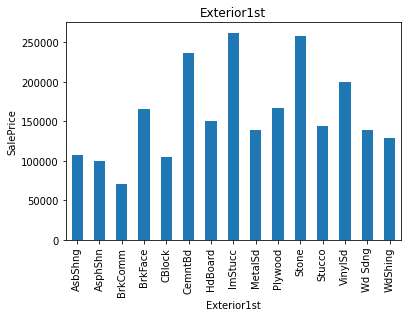

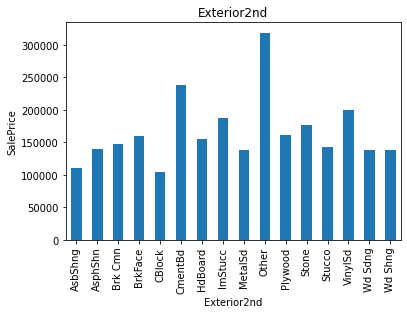

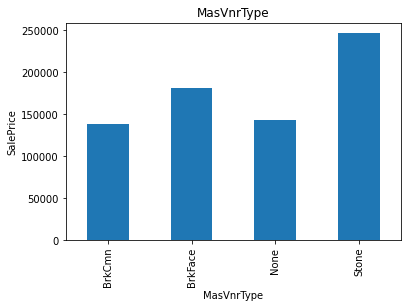

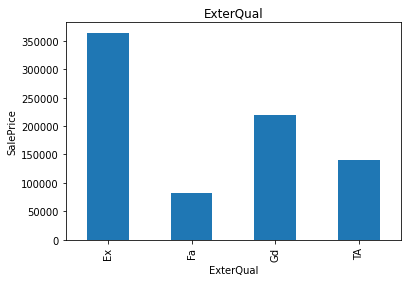

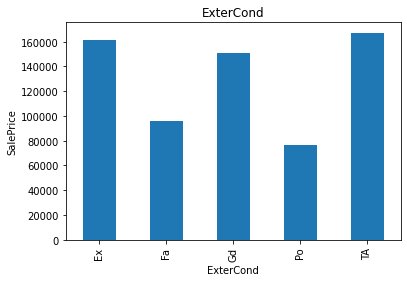

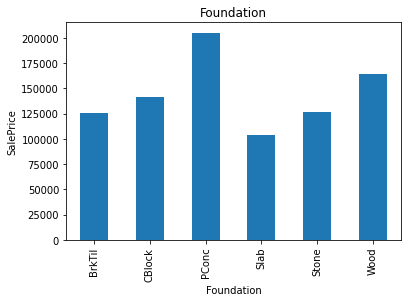

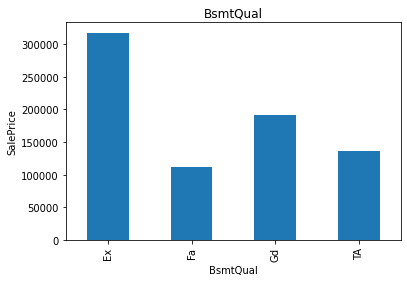

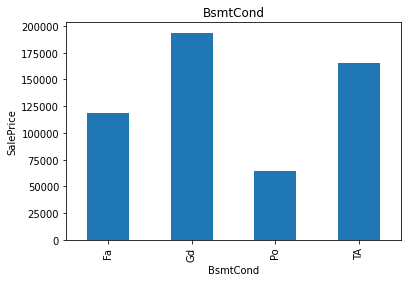

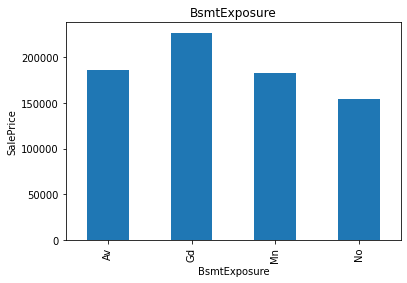

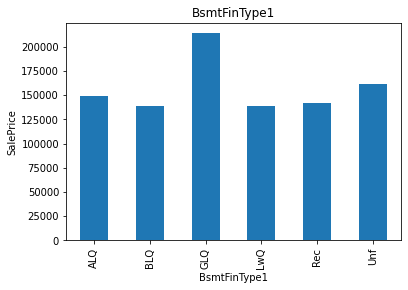

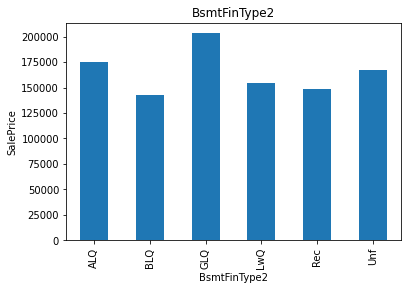

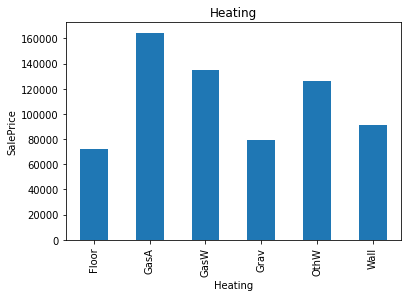

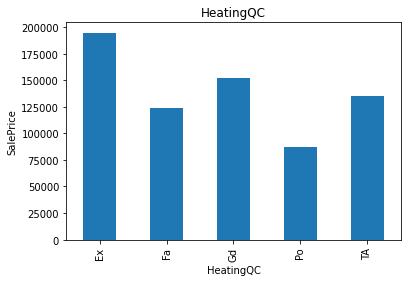

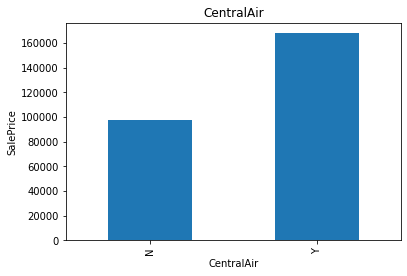

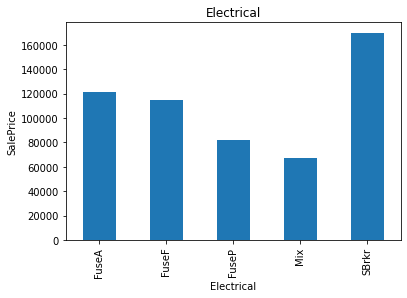

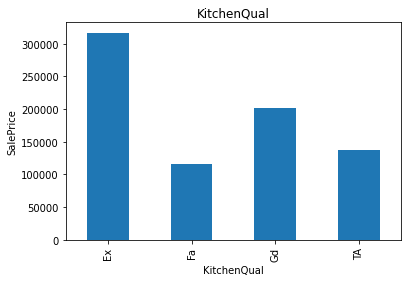

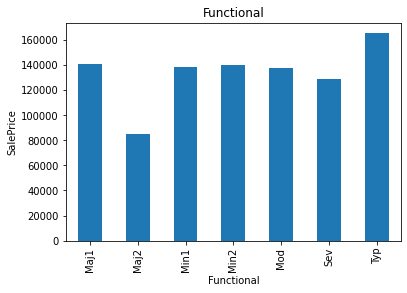

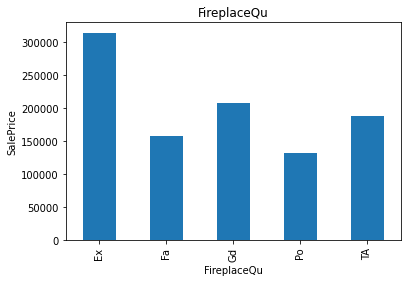

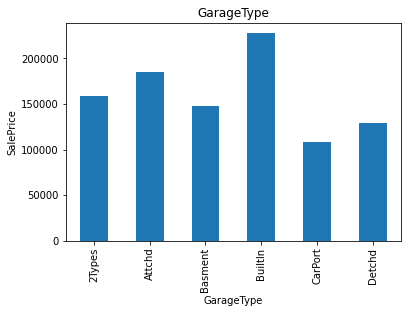

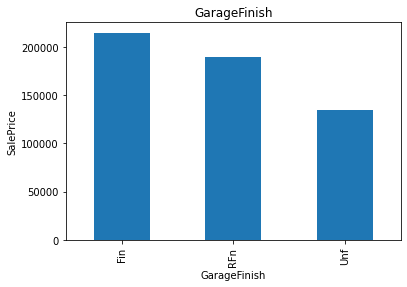

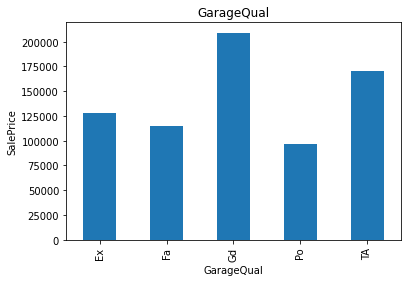

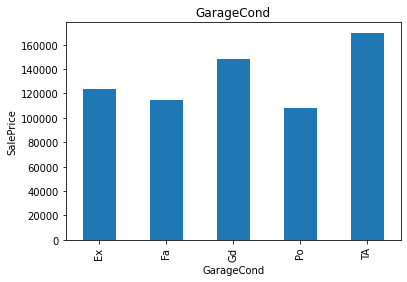

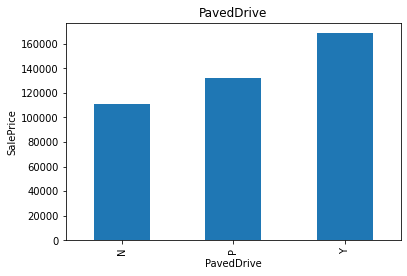

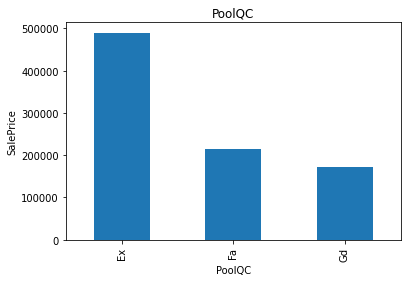

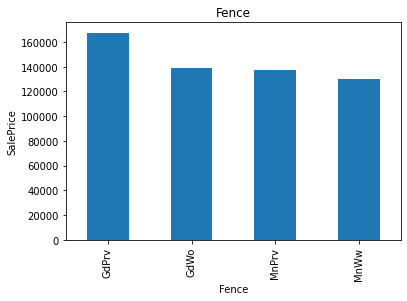

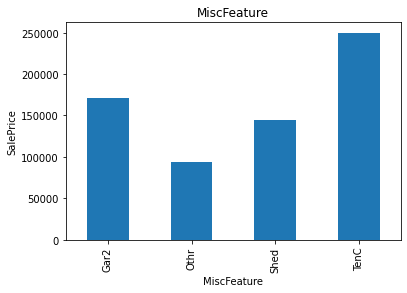

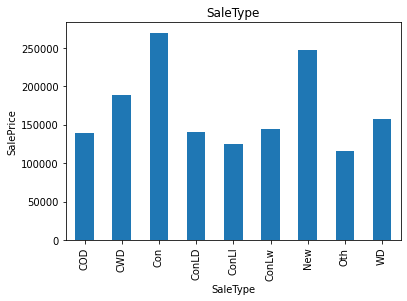

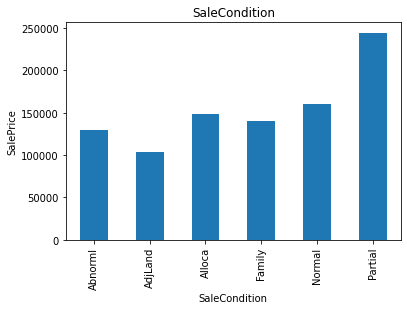

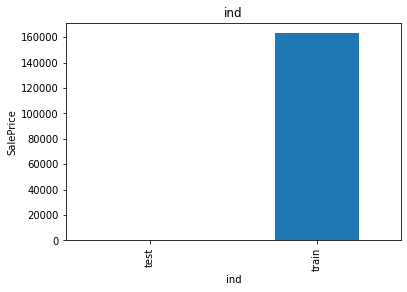

In [68]:
## Find out the relationship between categorical variable and dependent feature SalesPrice
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [69]:
df = df.drop([ 'Fence','PoolQC','MiscFeature','Alley'],axis=1)

In [70]:
#Handling missing values
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

MSZoning: 0.0014% missing values
Utilities: 0.0007% missing values
MasVnrType: 0.0082% missing values
BsmtQual: 0.0277% missing values
BsmtCond: 0.0281% missing values
BsmtExposure: 0.0281% missing values
BsmtFinType1: 0.0271% missing values
BsmtFinType2: 0.0274% missing values
Functional: 0.0007% missing values
FireplaceQu: 0.4865% missing values
GarageType: 0.0538% missing values
GarageFinish: 0.0545% missing values
GarageQual: 0.0545% missing values
GarageCond: 0.0545% missing values


In [71]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df=replace_cat_feature(df,features_nan)


In [72]:
df[features_nan].isnull().sum()

MSZoning        0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [73]:
pd.pandas.set_option('display.max_columns', None)

In [74]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,test,NaN
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,test,NaN
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,test,NaN
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,test,NaN
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,test,NaN


In [75]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

LotFrontage: 0.1665% missing value
MasVnrArea: 0.0079% missing value
BsmtFullBath: 0.0007% missing value
BsmtHalfBath: 0.0007% missing value
GarageYrBlt: 0.0545% missing value
SalePrice: 0.4998% missing value


In [76]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)

In [77]:
df[numerical_with_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
SalePrice       0
dtype: int64

In [78]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    df[feature]=np.log(df[feature])

Handling Rare Categorical Feature


We will remove categorical variables that are present less than 1% of the observations

In [79]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [80]:
for feature in categorical_features:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')
    

In [81]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [82]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1461,20,0,4.382027,9.360655,1,0,1,1,0,0,8,1,1,3,3,5,6,1961,1961,0,0,10,10,0,0.0,1,3,2,2,3,1,2,468.0,3,144.0,270.0,882.0,1,2,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,1,5,4,0,1,4,1961.0,1,1.0,730.0,2,3,2,140,0,0,0,120,0,0,6,2010,2,3,0,12.001505,0,0,0,0,0,1
1,1462,20,2,4.394449,9.565704,1,1,1,1,1,0,8,2,1,3,3,6,6,1958,1958,2,0,2,1,2,108.0,1,3,2,2,3,1,4,923.0,5,0.0,406.0,1329.0,1,2,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,3,6,4,0,1,4,1958.0,1,1.0,312.0,2,3,2,393,36,0,0,0,0,12500,6,2010,2,3,0,12.001505,0,0,0,0,0,1
2,1463,60,2,4.304065,9.534595,1,1,1,1,0,0,13,2,1,3,5,5,5,1997,1998,0,0,10,10,0,0.0,1,3,4,3,3,1,6,791.0,5,0.0,137.0,928.0,1,3,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,1,6,4,1,3,4,1997.0,3,2.0,482.0,2,3,2,212,34,0,0,0,0,0,3,2010,2,3,0,12.001505,0,0,0,0,0,1
3,1464,60,2,4.356709,9.208138,1,1,1,1,0,0,13,2,1,3,5,6,6,1998,1998,0,0,10,10,2,20.0,1,3,4,2,3,1,6,602.0,5,0.0,324.0,926.0,1,4,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,3,7,4,1,4,4,1998.0,3,2.0,470.0,2,3,2,360,36,0,0,0,0,0,6,2010,2,3,0,12.001505,0,0,0,0,0,1
4,1465,120,2,3.761200,8.518193,1,1,3,1,0,0,19,2,1,4,3,8,5,1992,1992,0,0,6,5,0,0.0,2,3,4,3,3,1,4,263.0,5,0.0,1017.0,1280.0,1,4,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,3,5,4,0,1,4,1992.0,2,2.0,506.0,2,3,2,0,82,0,0,144,0,0,1,2010,2,3,0,12.001505,0,0,0,0,0,1
5,1466,60,2,4.317488,9.210340,1,1,1,1,1,0,13,2,1,3,5,6,5,1993,1994,0,0,6,5,0,0.0,1,3,4,3,3,1,5,0.0,5,0.0,763.0,763.0,1,3,1,3,6.637258,892,0,7.411556,0.0,0.0,2,1,3,1,1,7,4,1,3,4,1993.0,3,2.0,440.0,2,3,2,157,84,0,0,0,0,0,4,2010,2,3,0,12.001505,0,0,0,0,0,1
6,1467,20,2,4.219508,8.984694,1,1,1,1,0,0,13,2,1,3,3,6,7,1992,2007,0,0,6,5,0,0.0,1,2,4,3,3,1,4,935.0,5,0.0,233.0,1168.0,1,4,1,3,7.079184,0,0,7.079184,1.0,0.0,2,0,3,1,1,6,4,0,1,4,1992.0,3,2.0,420.0,2,3,2,483,21,0,0,0,0,500,3,2010,2,3,0,12.001505,1,0,0,0,0,1
7,1468,60,2,4.143135,9.036225,1,1,1,1,0,0,13,2,1,3,5,6,5,1998,1998,0,0,10,10,0,0.0,1,3,4,3,3,1,5,0.0,5,0.0,789.0,789.0,1,3,1,3,6.670766,676,0,7.289611,0.0,0.0,2,1,3,1,1,7,4,1,4,4,1998.0,3,2.0,393.0,2,3,2,0,75,0,0,0,0,0,5,2010,2,3,0,12.001505,0,0,0,0,0,1
8,1469,20,2,4.442651,9.227787,1,0,1,1,0,0,13,2,1,3,3,7,5,1990,1990,0,0,6,5,0,0.0,1,3,4,3,3,4,6,637.0,5,0.0,663.0,1300.0,1,3,1,3,7.201171,0,0,7.201171,1.0,0.0,1,1,2,1,3,5,4,1,0,4,1990.0,1,2.0,506.0,2,3,2,192,0,0,0,0,0,0,2,2010,2,3,0,12.001505,0,0,0,0,0,1
9,1470,20,2,4.248495,9.035987,1,0,1,1,1,0,8,2,1,3,3,4,5,1970,1970,0,0,7,7,0,0.0,1,3,2,2,3,1,4,804.0,2,78.0,0.0,882.0,1,2,1,3,6.782192,0,0,6.782192,1.0,0.0,1,0,2,1,1,4,4,0,1,4,1970.0,3,2.0,525.0,2,3,2,240,0,0,0,0,0,0,4,2010,2,3,0,12.001505,0,0,0,0,0,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2919 non-null   int64  
 1   MSSubClass       2919 non-null   int64  
 2   MSZoning         2919 non-null   int64  
 3   LotFrontage      2919 non-null   float64
 4   LotArea          2919 non-null   float64
 5   Street           2919 non-null   int64  
 6   LotShape         2919 non-null   int64  
 7   LandContour      2919 non-null   int64  
 8   Utilities        2919 non-null   int64  
 9   LotConfig        2919 non-null   int64  
 10  LandSlope        2919 non-null   int64  
 11  Neighborhood     2919 non-null   int64  
 12  Condition1       2919 non-null   int64  
 13  Condition2       2919 non-null   int64  
 14  BldgType         2919 non-null   int64  
 15  HouseStyle       2919 non-null   int64  
 16  OverallQual      2919 non-null   int64  
 17  OverallCond   

In [85]:
scaling_feature=[feature for feature in df.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83

In [86]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch

Feature scaling

In [88]:
feature_scale=[feature for feature in df.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [89]:
scaler.transform(df[feature_scale])

array([[0.        , 0.        , 0.49506375, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.66666667, 0.49966182, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.66666667, 0.46620707, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.29411765, 0.66666667, 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [90]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1461,20,0,4.382027,9.360655,1,0,1,1,0,0,8,1,1,3,3,5,6,1961,1961,0,0,10,10,0,0.0,1,3,2,2,3,1,2,468.0,3,144.0,270.0,882.0,1,2,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,1,5,4,0,1,4,1961.0,1,1.0,730.0,2,3,2,140,0,0,0,120,0,0,6,2010,2,3,0,12.001505,0,0,0,0,0,1
1,1462,20,2,4.394449,9.565704,1,1,1,1,1,0,8,2,1,3,3,6,6,1958,1958,2,0,2,1,2,108.0,1,3,2,2,3,1,4,923.0,5,0.0,406.0,1329.0,1,2,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,3,6,4,0,1,4,1958.0,1,1.0,312.0,2,3,2,393,36,0,0,0,0,12500,6,2010,2,3,0,12.001505,0,0,0,0,0,1
2,1463,60,2,4.304065,9.534595,1,1,1,1,0,0,13,2,1,3,5,5,5,1997,1998,0,0,10,10,0,0.0,1,3,4,3,3,1,6,791.0,5,0.0,137.0,928.0,1,3,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,1,6,4,1,3,4,1997.0,3,2.0,482.0,2,3,2,212,34,0,0,0,0,0,3,2010,2,3,0,12.001505,0,0,0,0,0,1
3,1464,60,2,4.356709,9.208138,1,1,1,1,0,0,13,2,1,3,5,6,6,1998,1998,0,0,10,10,2,20.0,1,3,4,2,3,1,6,602.0,5,0.0,324.0,926.0,1,4,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,3,7,4,1,4,4,1998.0,3,2.0,470.0,2,3,2,360,36,0,0,0,0,0,6,2010,2,3,0,12.001505,0,0,0,0,0,1
4,1465,120,2,3.761200,8.518193,1,1,3,1,0,0,19,2,1,4,3,8,5,1992,1992,0,0,6,5,0,0.0,2,3,4,3,3,1,4,263.0,5,0.0,1017.0,1280.0,1,4,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,3,5,4,0,1,4,1992.0,2,2.0,506.0,2,3,2,0,82,0,0,144,0,0,1,2010,2,3,0,12.001505,0,0,0,0,0,1


In [91]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [93]:
df = df.drop(['Id','YrSold','YearRemodAdd','YearBuilt','GarageYrBlt'],axis=1)

In [98]:
import seaborn as sns

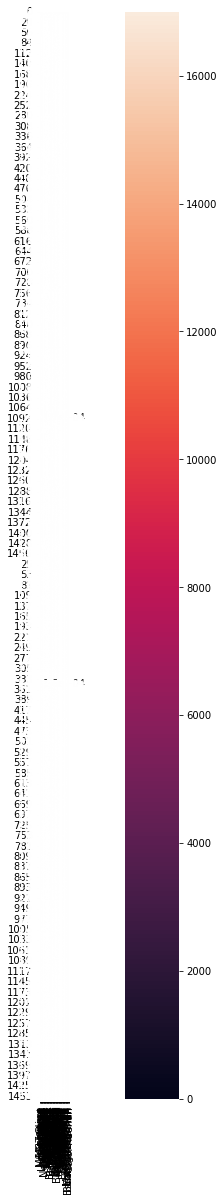

In [99]:
# Heatmap with log transformation on target variable

corr_matrix = df.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(df, annot=True, square=True);


Feature Selection

In [94]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [96]:
from sklearn.model_selection import train_test_split